In [1]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import XGBClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix, mean_squared_error,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data

breast = pd.read_csv(r"C:\Users\Admin\Desktop\Breast Cancer For Project Work.csv")

# To see the top 5 rows in the data

breast.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
# To instantiate LabelEncoder

le = LabelEncoder()
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

print ("0 = Benign Cells")
print ("1 = Malignant Cells")

0 = Benign Cells
1 = Malignant Cells


In [4]:
# To see the top 5 rows in the data

breast.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:

breast_counts = breast['diagnosis'].value_counts()

In [6]:
# To check the dimension of the data

breast.shape

(569, 32)

In [7]:
print("diagnosis:")
print(breast_counts)

diagnosis:
0    357
1    212
Name: diagnosis, dtype: int64


In [8]:
# To check the structure of the data

breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# To check the missing values

breast.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# To check the duplication

breast.duplicated().sum()

0

In [11]:
# To randomly select any 5 rows in the data

breast.sample(5)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
282     89122          1        19.40         18.18          127.20   
50     857343          0        11.76         21.60           74.72   
3    84348301          1        11.42         20.38           77.58   
435    908489          1        13.98         19.62           91.12   
131      8670          1        15.46         19.48          101.70   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
282     1145.0          0.10370           0.14420         0.16260   
50       427.9          0.08637           0.04966         0.01657   
3        386.1          0.14250           0.28390         0.24140   
435      599.5          0.10600           0.11330         0.11260   
131      748.9          0.10920           0.12230         0.14660   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
282              0.09464  ...         23.79          28.65           152.40   
50               0.01115  ...         12.98          25.72            82.98   
3                0.10520  ...         14.91          26.50            98.87   
435              0.06463  ...         17.04          30.80           113.90   
131              0.08087  ...         19.26          26.00           124.90   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
282      1628.0            0.1518            0.37490          0.43160   
50        516.5            0.1085            0.08615          0.05523   
3         567.7            0.2098            0.86630          0.68690   
435       869.3            0.1613            0.35680          0.40690   
131      1156.0            0.1546            0.23940          0.37910   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
282               0.22520          0.3590                  0.07787  
50                0.03715          0.2433                  0.06563  
3                 0.25750          0.6638                  0.17300  
435               0.18270          0.3179                  0.10550  
131               0.15140          0.2837                  0.08019  

[5 rows x 32 columns]

In [12]:
# To see the descriptive statistics

breast.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.3

In [13]:
# To know the correlation among the variables

breast_df = breast.corr()
breast_df

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

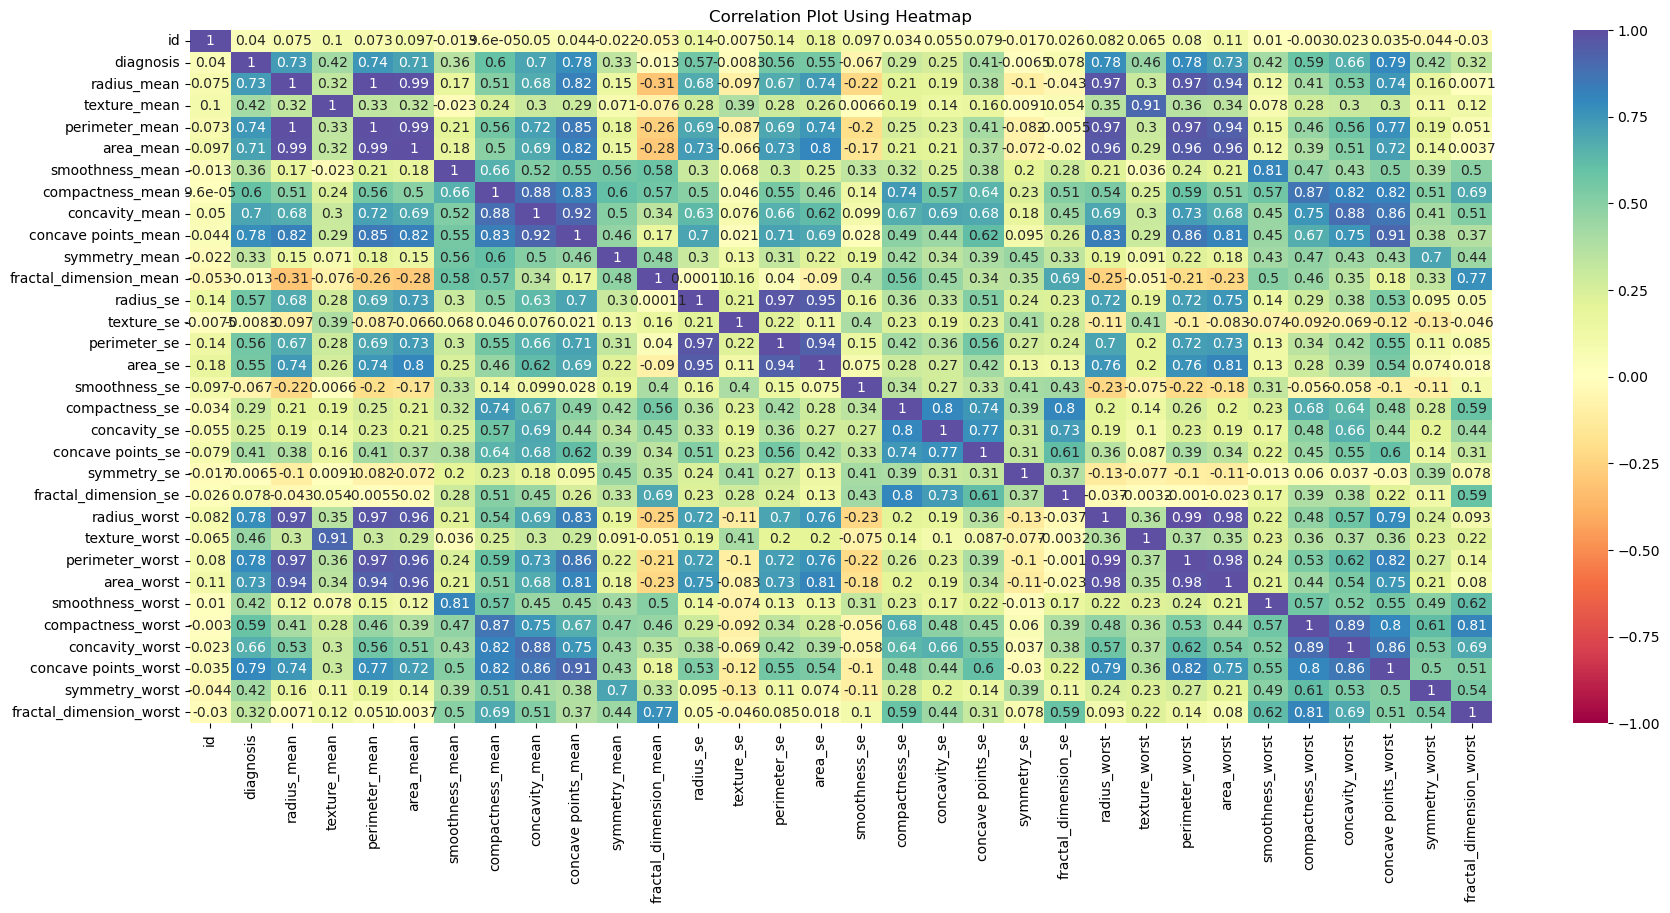

In [14]:
# To view the corrlation using heatmap

plt.figure(figsize=(21,9))
sns.heatmap(data= breast_df, annot=True, vmin =-1, vmax =1, cmap="Spectral")
plt.title("Correlation Plot Using Heatmap")
plt.show();

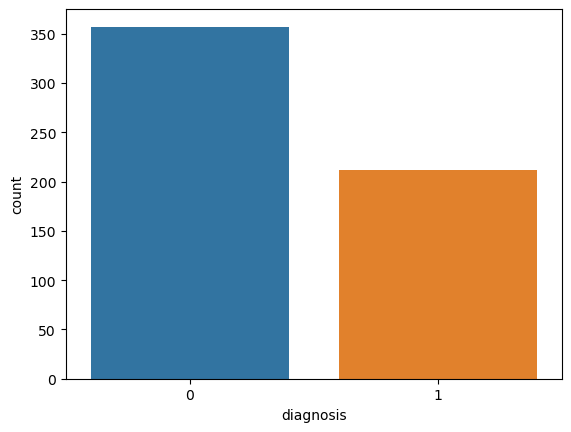

In [15]:
# count of M and B

sns.countplot(data = breast, x = "diagnosis");

In [16]:
# To know the percentage of M and B

breast["diagnosis"].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

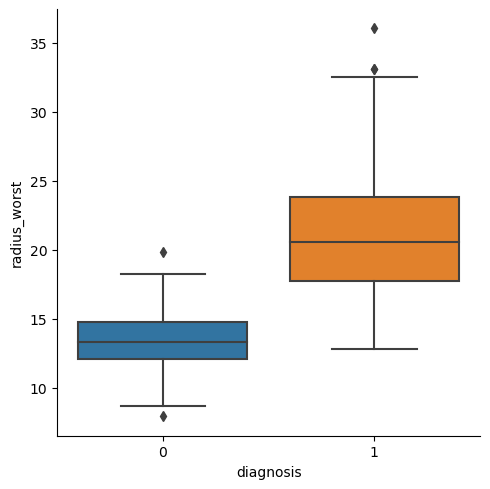

In [17]:
sns.catplot(data = breast, x ="diagnosis", y = "radius_worst", kind= "box" );
#plt.xlabel("diagnosis")
#plt.ylabel("radius_mean")

In [18]:
breast['diagnosis'].groupby([breast['radius_mean'], breast['radius_se'], 
                             breast['radius_worst']]).max()

radius_mean  radius_se  radius_worst
6.981        0.2241     7.930           0
7.691        0.2196     8.678           0
7.729        0.3777     9.077           0
7.760        0.3857     9.456           0
8.196        0.1563     8.964           0
                                       ..
25.220       0.8973     30.000          1
25.730       0.9948     33.130          1
27.220       0.8361     33.120          1
27.420       2.5470     36.040          1
28.110       2.8730     28.110          1
Name: diagnosis, Length: 569, dtype: int32

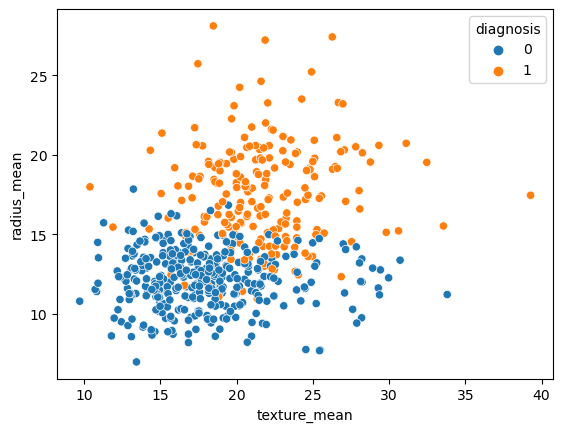

In [19]:
# Scatter plot of the target and the radius variable

sns.scatterplot(data = breast, y = "radius_mean", x = "texture_mean", hue= "diagnosis");

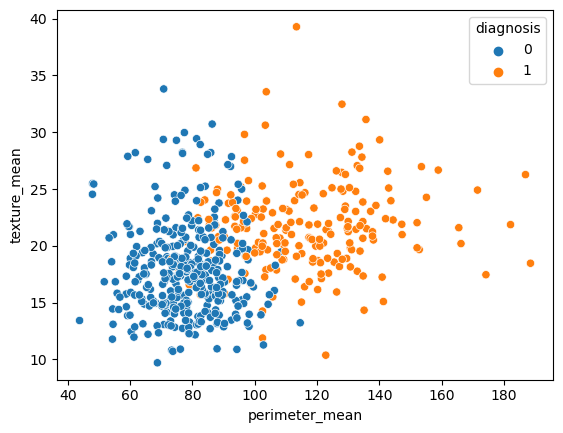

In [20]:
sns.scatterplot(data = breast, y = "texture_mean", x = "perimeter_mean", hue= "diagnosis");

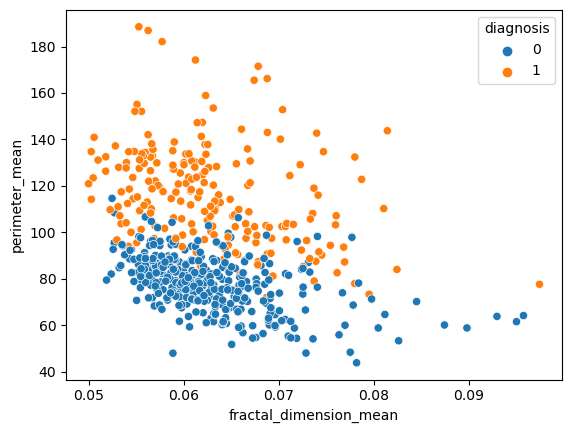

In [21]:

sns.scatterplot(data = breast, y = "perimeter_mean", x = "fractal_dimension_mean", hue= "diagnosis");

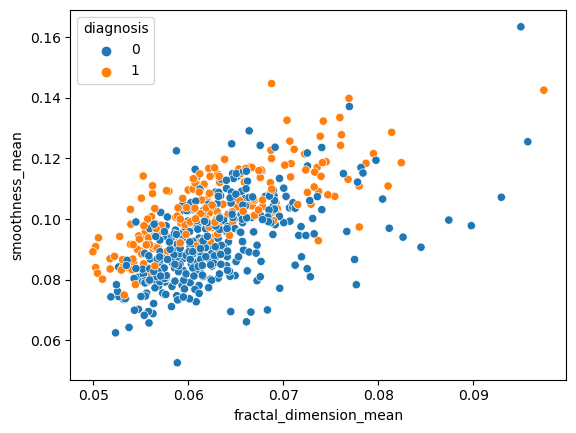

In [22]:
sns.scatterplot(data = breast, y = "smoothness_mean", x = "fractal_dimension_mean", hue="diagnosis");

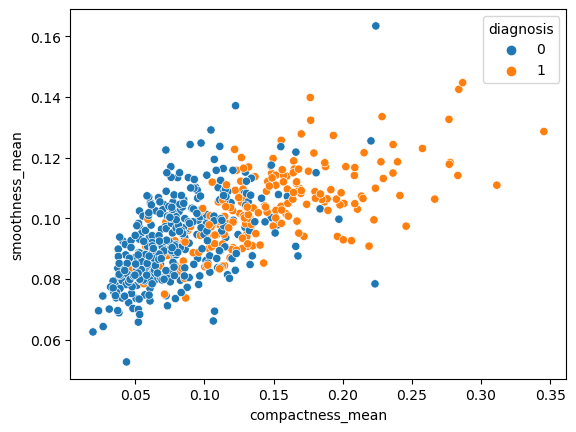

In [23]:
sns.scatterplot(data = breast, y = "smoothness_mean", x = "compactness_mean", hue="diagnosis");

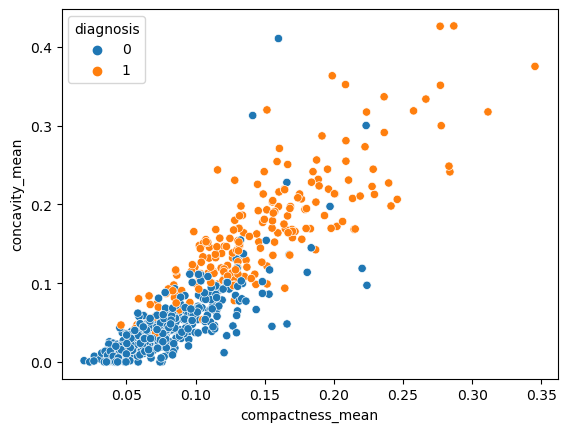

In [24]:
sns.scatterplot(data = breast, y = "concavity_mean", x = "compactness_mean", hue="diagnosis");

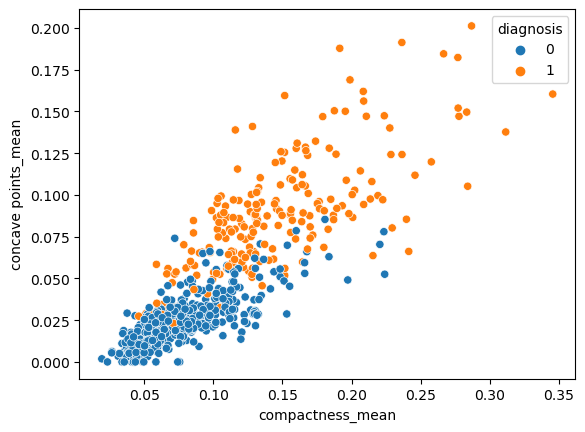

In [25]:
sns.scatterplot(data = breast, y = "concave points_mean", x = "compactness_mean", hue="diagnosis");

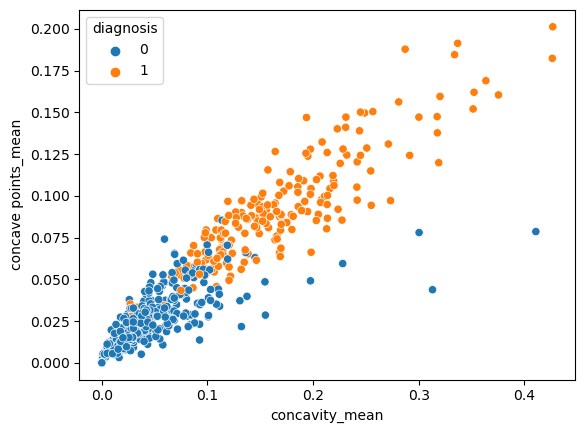

In [26]:
sns.scatterplot(data = breast, y = "concave points_mean", x = "concavity_mean", hue="diagnosis");

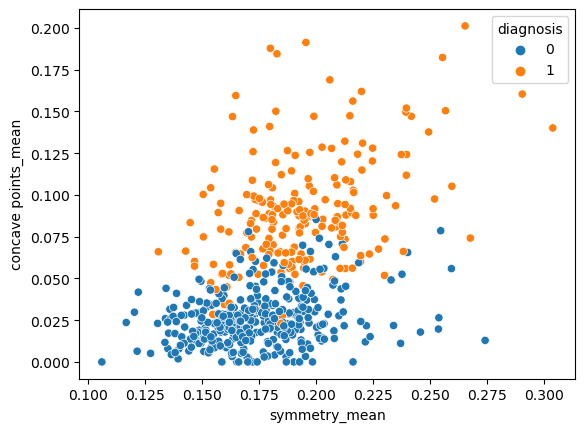

In [27]:
sns.scatterplot(data = breast, y = "concave points_mean", x = "symmetry_mean", hue="diagnosis");

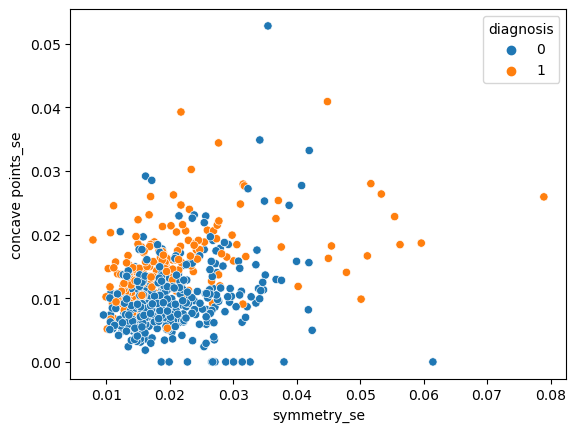

In [28]:
sns.scatterplot(data = breast, y = "concave points_se", x = "symmetry_se", hue="diagnosis");

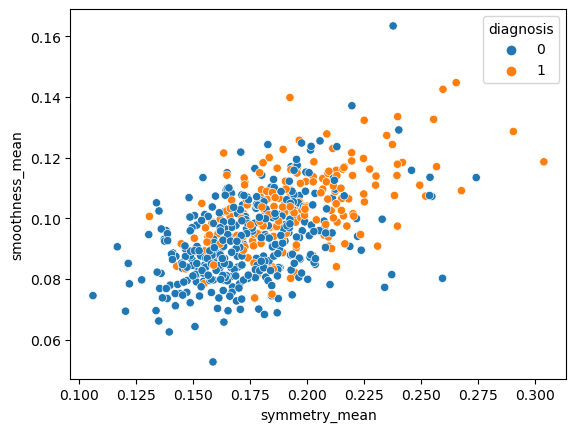

In [29]:
sns.scatterplot(data = breast, y = "smoothness_mean", x = "symmetry_mean", hue="diagnosis");

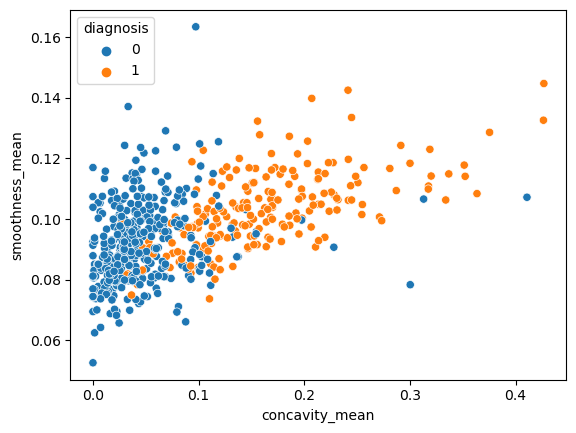

In [30]:
sns.scatterplot(data = breast, y = "smoothness_mean", x = "concavity_mean", hue="diagnosis");

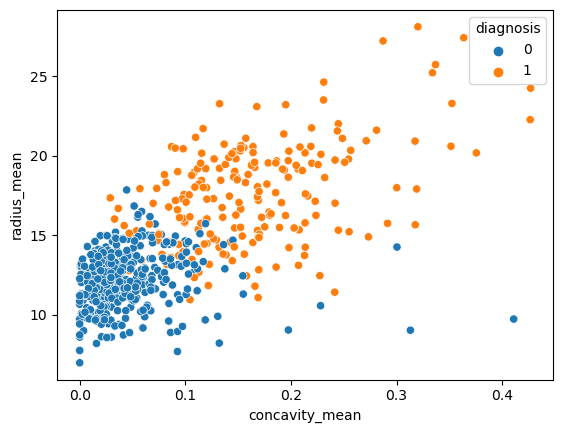

In [31]:
sns.scatterplot(data = breast, y = "radius_mean", x = "concavity_mean", hue="diagnosis");

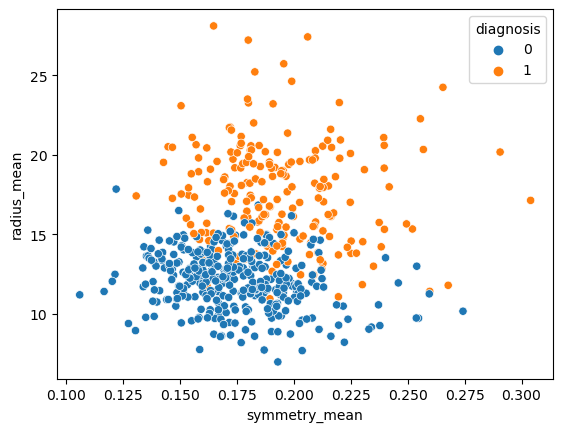

In [32]:
sns.scatterplot(data = breast, y = "radius_mean", x = "symmetry_mean", hue="diagnosis");

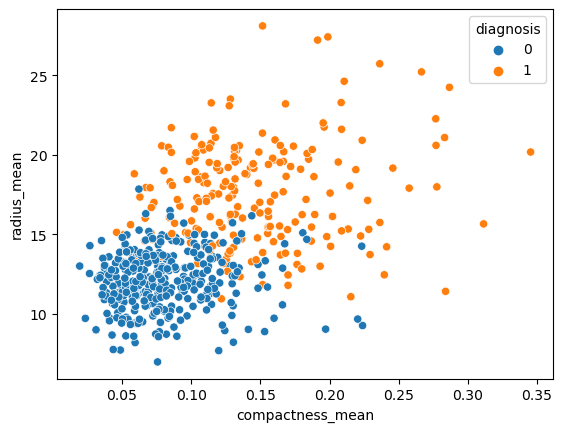

In [33]:
sns.scatterplot(data = breast, y = "radius_mean", x = "compactness_mean", hue="diagnosis");

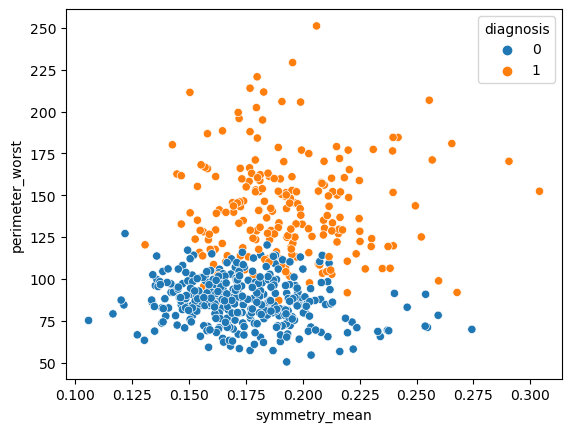

In [34]:
sns.scatterplot(data = breast, y = "perimeter_worst", x = "symmetry_mean", hue="diagnosis");

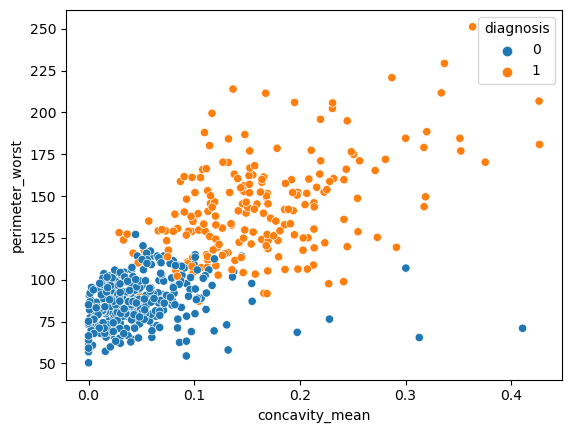

In [35]:
sns.scatterplot(data = breast, y = "perimeter_worst", x = "concavity_mean", hue="diagnosis");

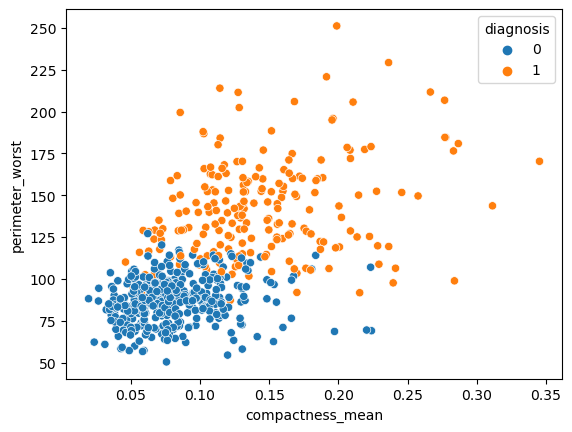

In [36]:
sns.scatterplot(data = breast, y = "perimeter_worst", x = "compactness_mean", hue="diagnosis");

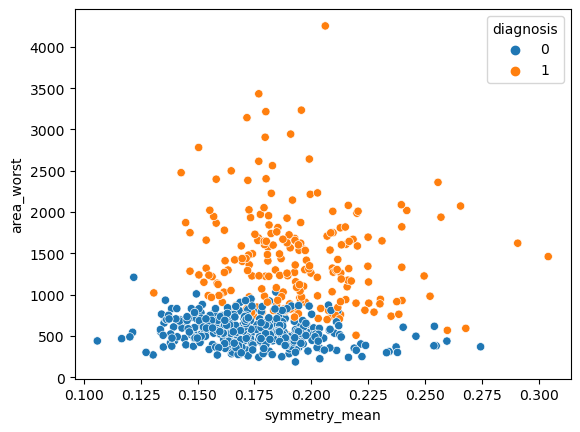

In [37]:
sns.scatterplot(data = breast, y = "area_worst", x = "symmetry_mean", hue="diagnosis");

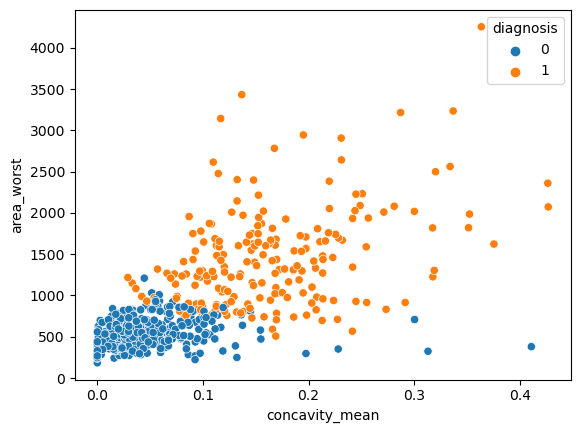

In [38]:
sns.scatterplot(data = breast, y = "area_worst", x = "concavity_mean", hue="diagnosis");

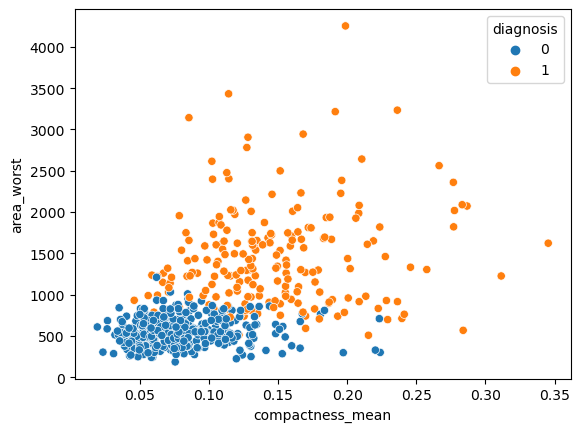

In [39]:
sns.scatterplot(data = breast, y = "area_worst", x = "compactness_mean", hue="diagnosis");

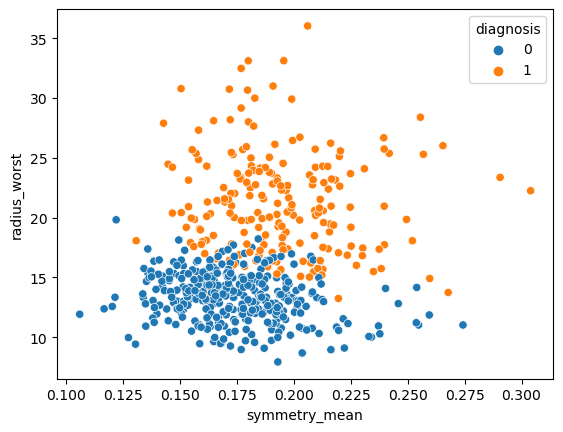

In [40]:
sns.scatterplot(data = breast, y = "radius_worst", x = "symmetry_mean", hue="diagnosis");

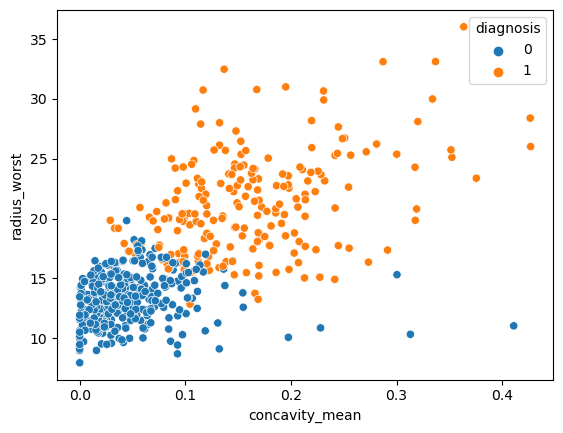

In [41]:
sns.scatterplot(data = breast, y = "radius_worst", x = "concavity_mean", hue="diagnosis");

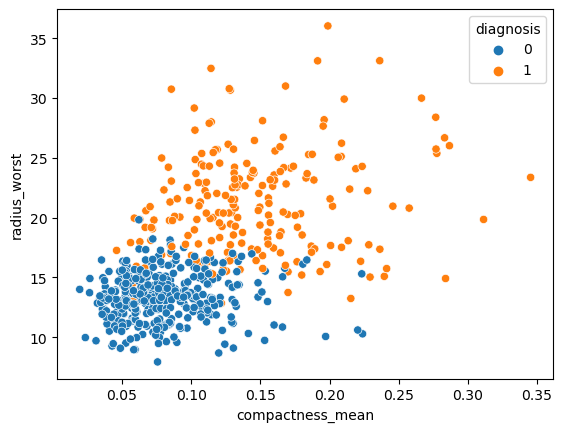

In [42]:
sns.scatterplot(data = breast, y = "radius_worst", x = "compactness_mean", hue="diagnosis");

In [43]:
breast_cancer = breast.drop(["id", "diagnosis"], axis=1)

# Check For Outliers

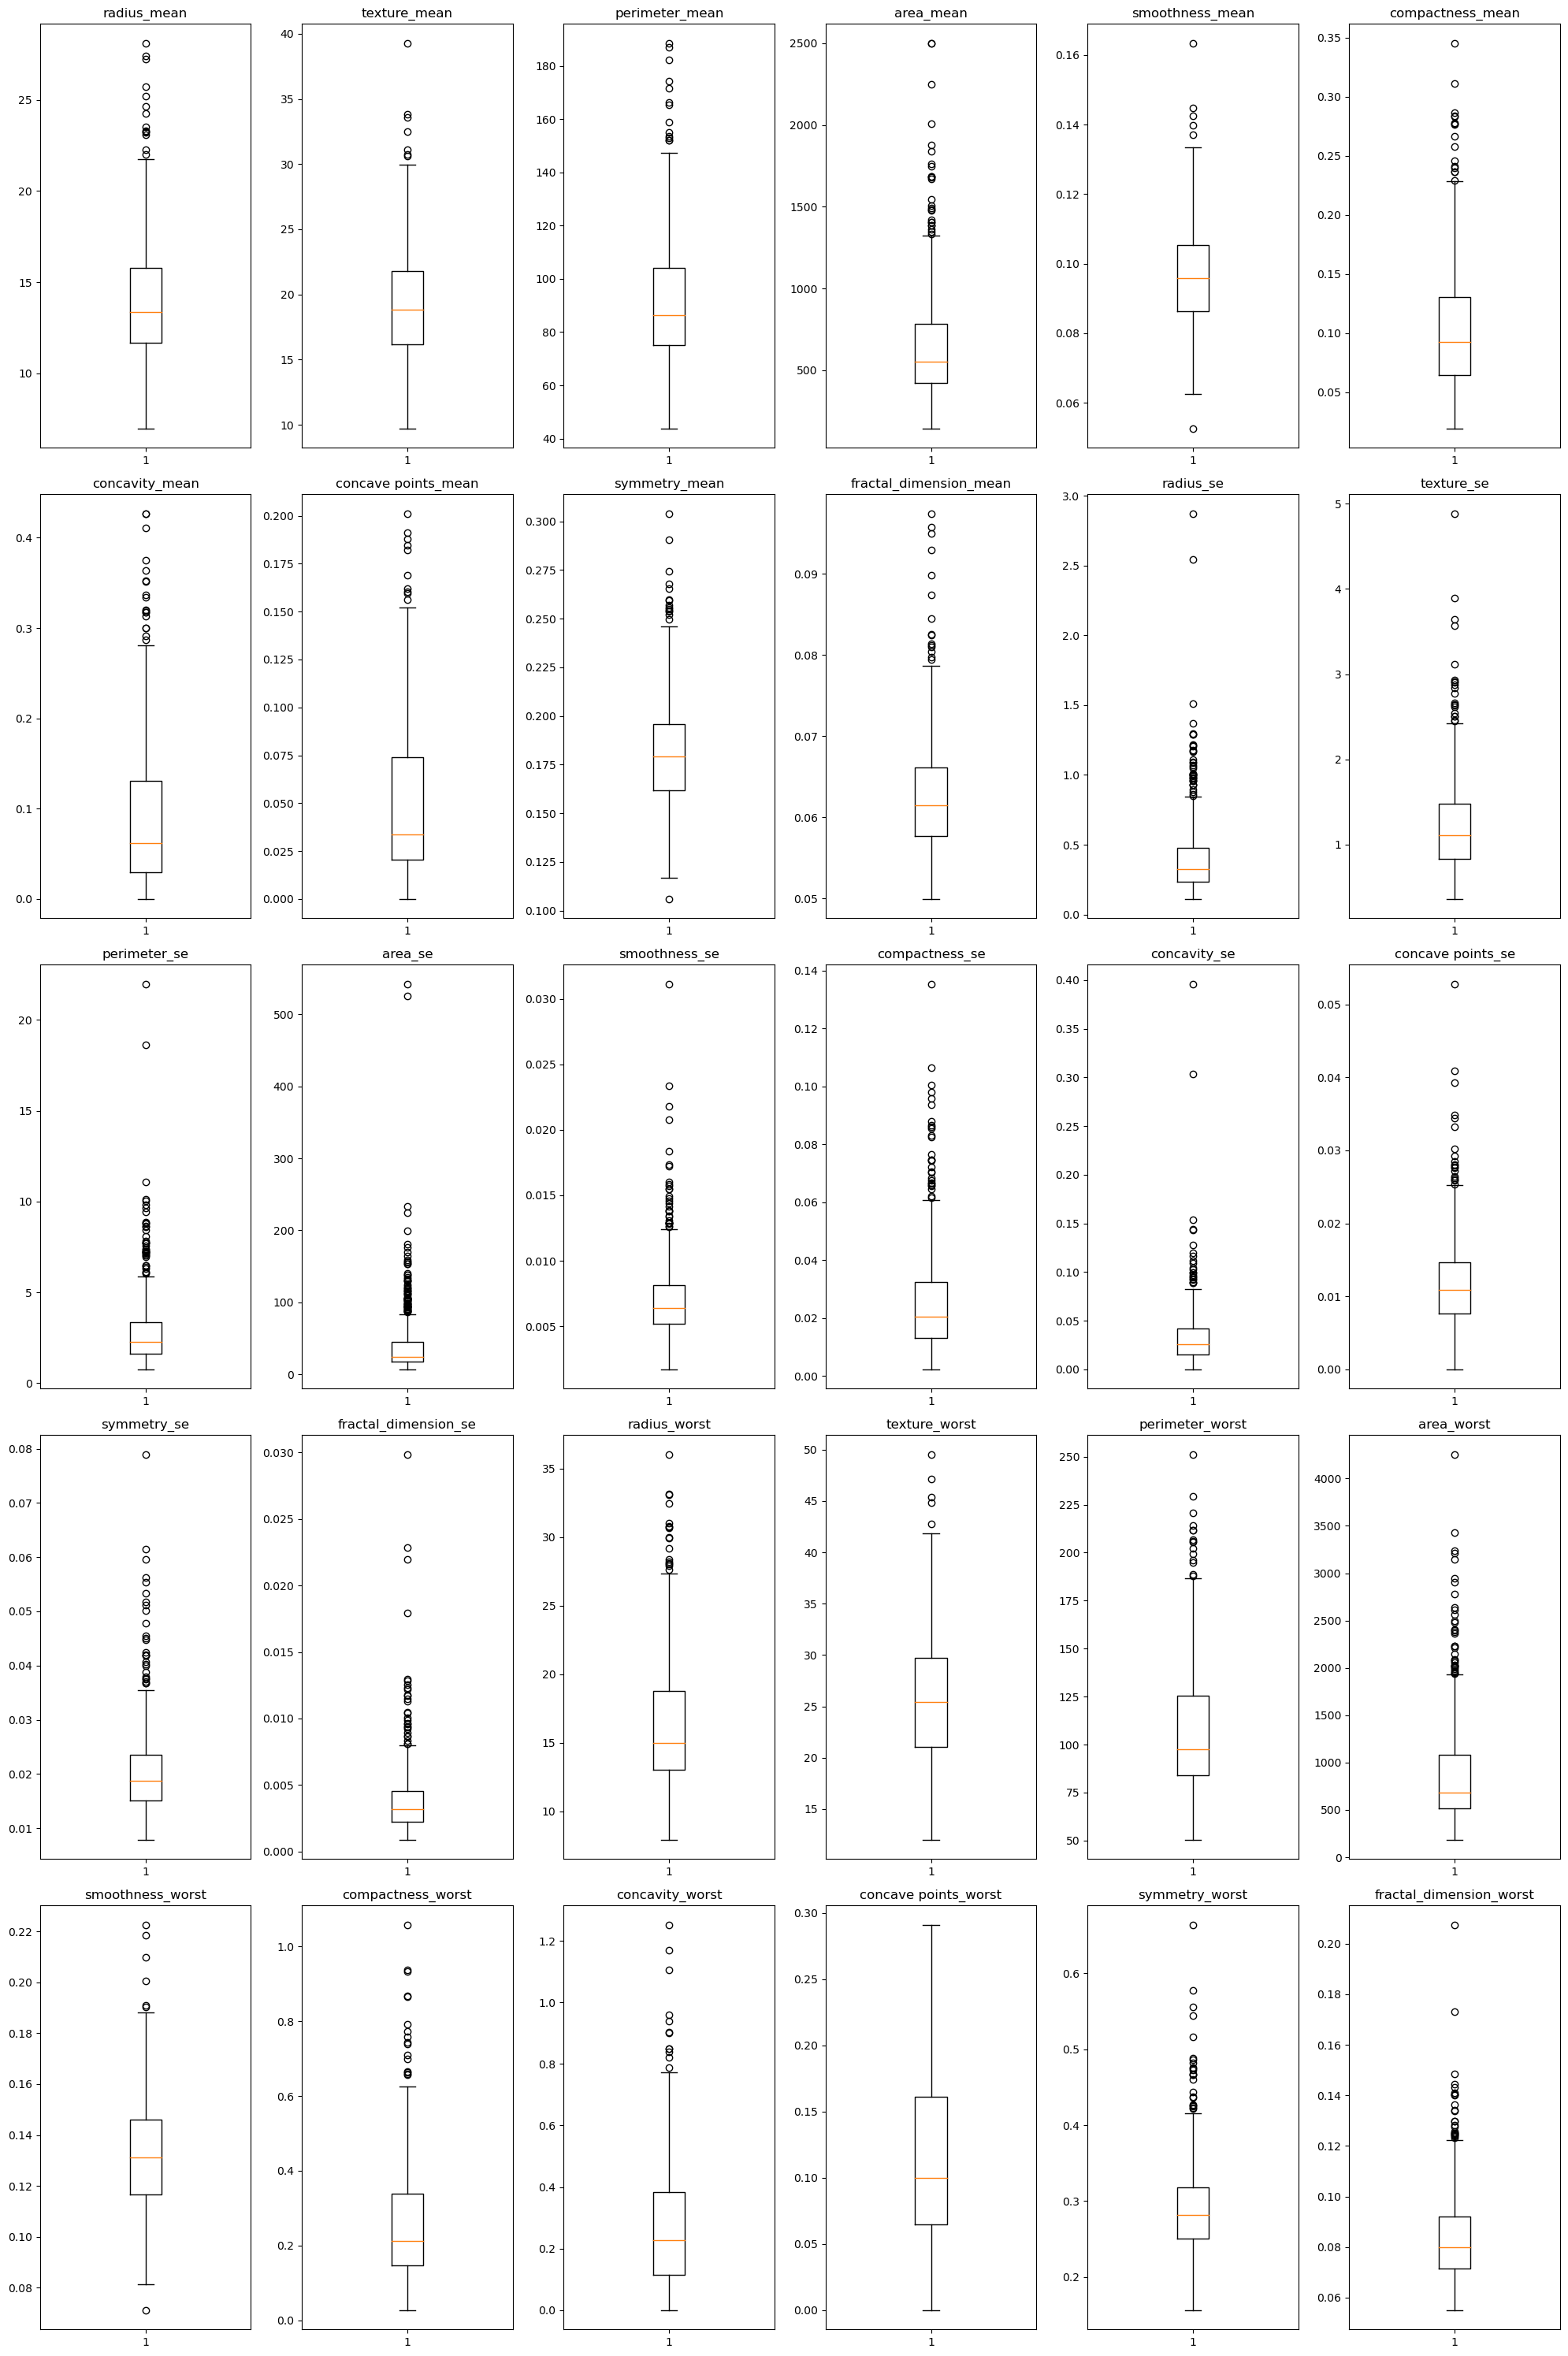

In [44]:
# outlier detection using boxplot

numeric_columns = breast_cancer.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 6, i + 1)
    plt.boxplot(breast[variable])
    plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show();

# Treating The Outliers

In [45]:
# Function to treat these outliers

def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [46]:
# treating the outliers
df_col = breast_cancer
df = treat_outliers_all(breast_cancer, df_col)

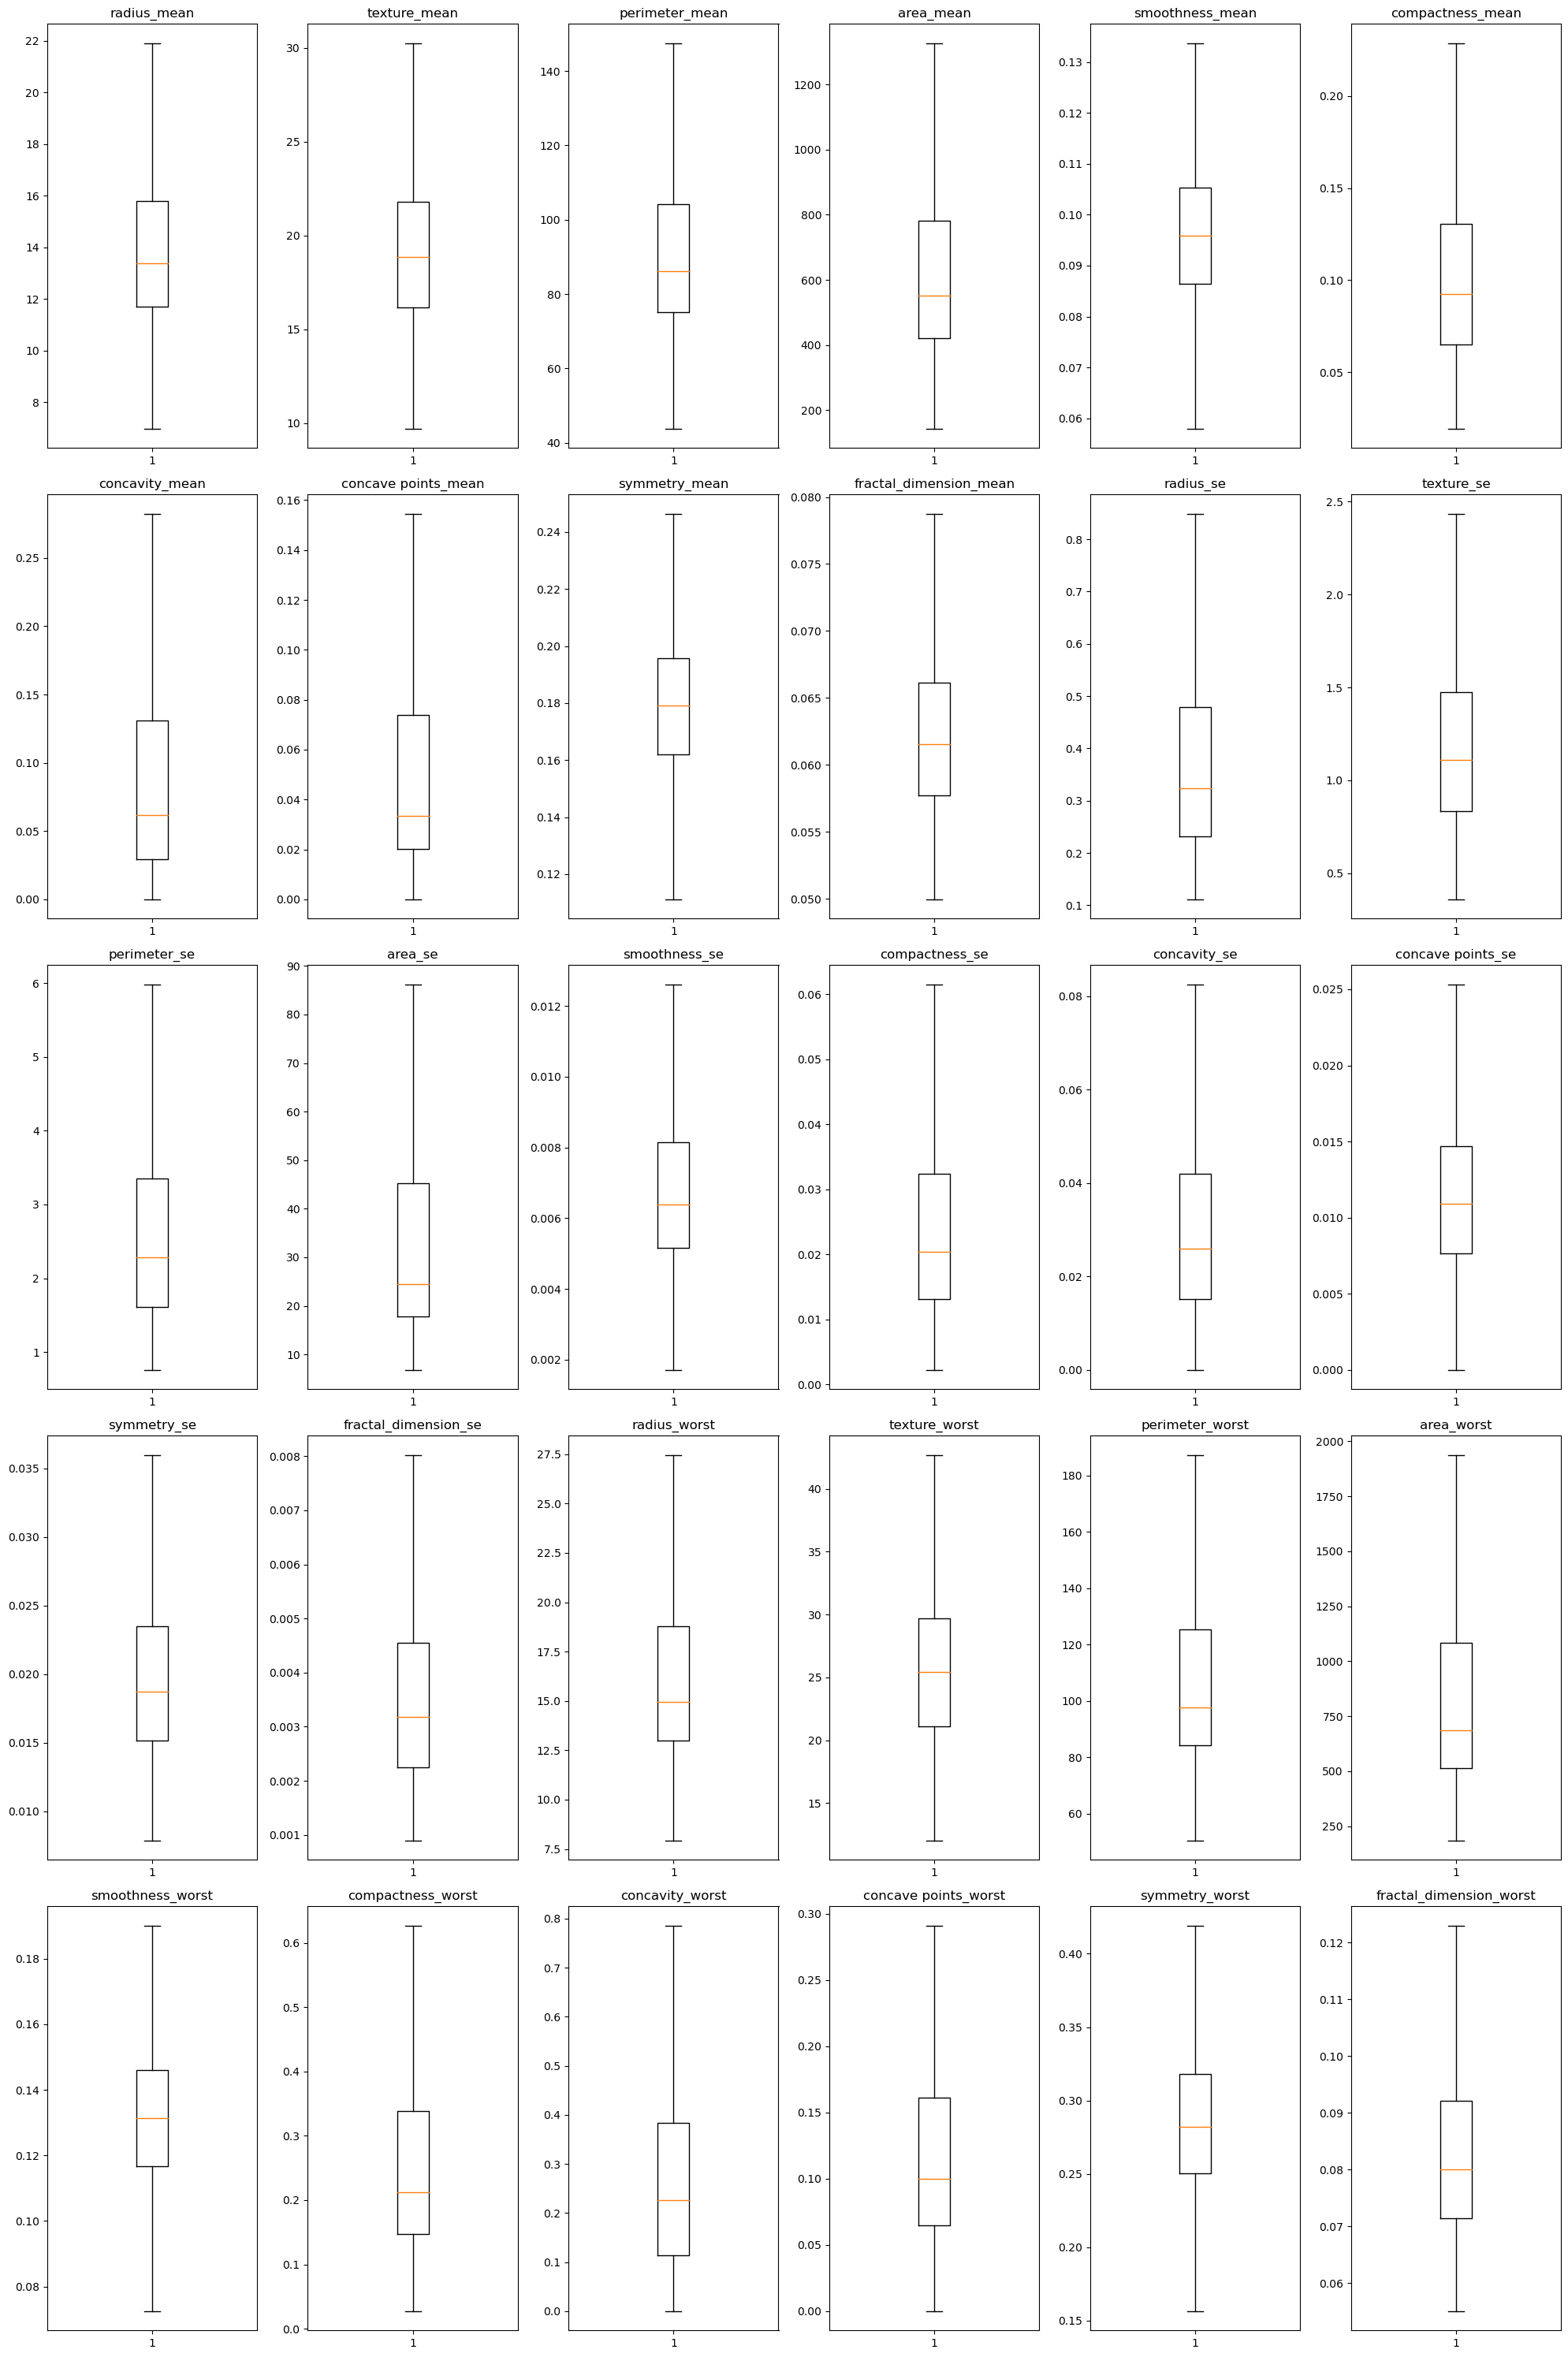

In [47]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 6, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Random Forest Classifier

In [48]:
# To confirm the values of target again

breast["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [49]:
# To select the features and the target

y = breast['diagnosis']
X = breast_cancer

In [50]:
# To split the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0, stratify =y)

In [51]:
# To check their dimension

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [52]:
# To create an instant of the model

rfcA = RandomForestClassifier(random_state=0)

# To train the model

rfcA.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
rfcA.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [54]:
# function to compute different metrics to check performance of a classification model

def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
     # convert probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute accuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],),
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf, fmt="g", annot=True)
    plt.ylabel("Actual Value")
    plt.xlabel("Predicted value")
    plt.show()

    return df_perf

In [55]:
# To know the important values of the variables the model used

rfcA.feature_importances_

array([0.03805861, 0.01264832, 0.04625365, 0.03577696, 0.00842457,
       0.00904298, 0.08822929, 0.13792714, 0.00471318, 0.00339536,
       0.02485115, 0.0044556 , 0.01200953, 0.02005183, 0.00526482,
       0.00496037, 0.00368534, 0.00368475, 0.00386233, 0.00488991,
       0.09990893, 0.01539526, 0.13698009, 0.07153559, 0.01176899,
       0.01314631, 0.04394757, 0.11660598, 0.0114667 , 0.00705889])

In [56]:
feature_importances = rfcA.feature_importances_

In [57]:
feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

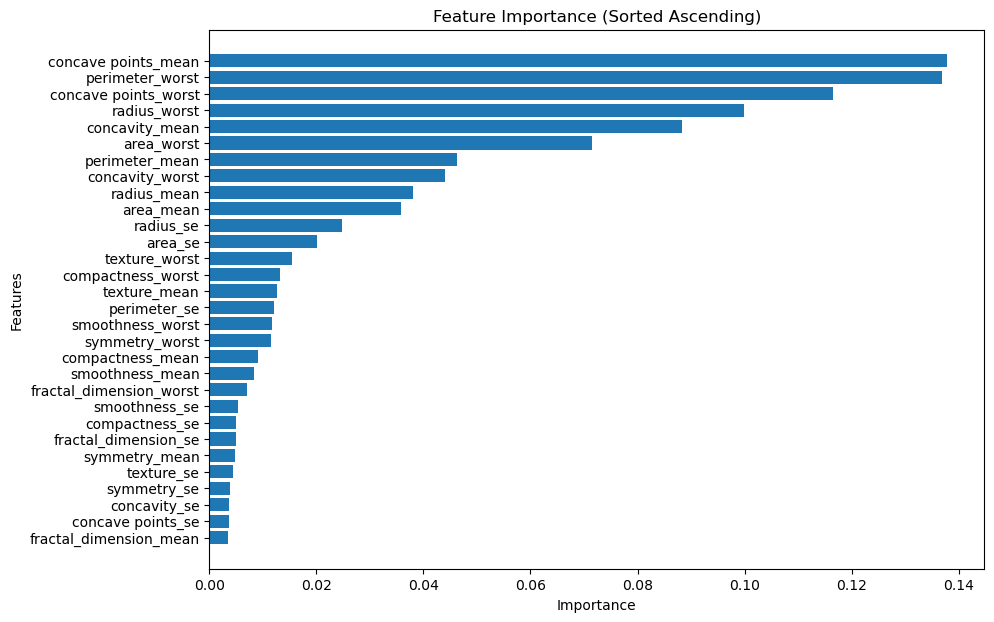

In [58]:
#To sorts feature importances and their corresponding names in ascending order then create a horizontal bar chart
# and visualize the sorted feature importances with their respective feature names.

sorted_indices = np.argsort(feature_importances)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

plt.figure(figsize=(10, 7))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Sorted Ascending)')
plt.show()

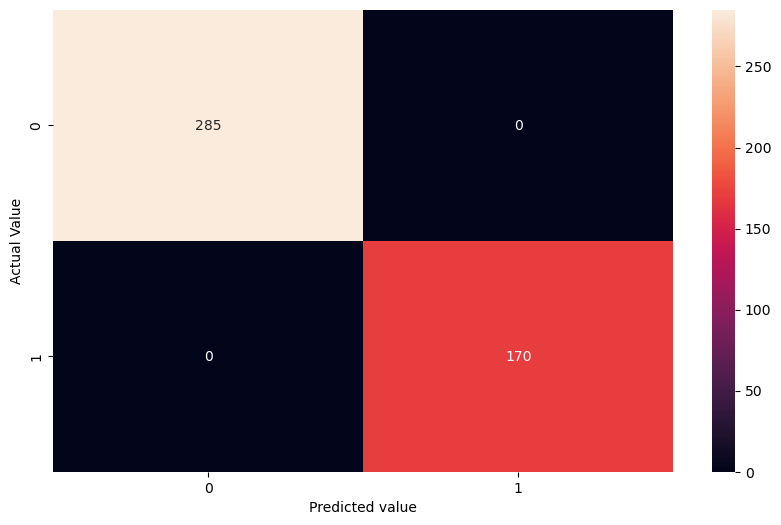

(   Accuracy  Recall  Precision  F1-score
 0       1.0     1.0        1.0       1.0,)

In [59]:
# To check the training performance

breast_train = model_performance_classification(rfcA, x_train, y_train)

breast_train

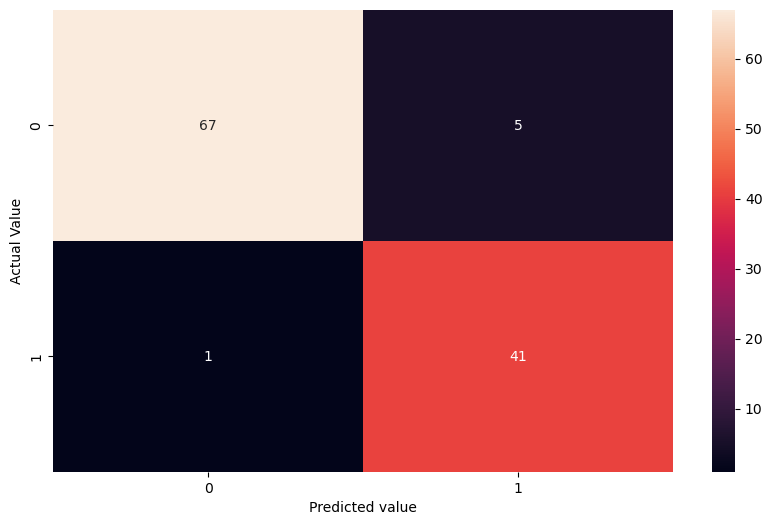

(   Accuracy   Recall  Precision  F1-score
 0  0.947368  0.97619   0.891304  0.931818,)

In [60]:
# To check the model testing performance

breast_test = model_performance_classification(rfcA, x_test, y_test)

breast_test

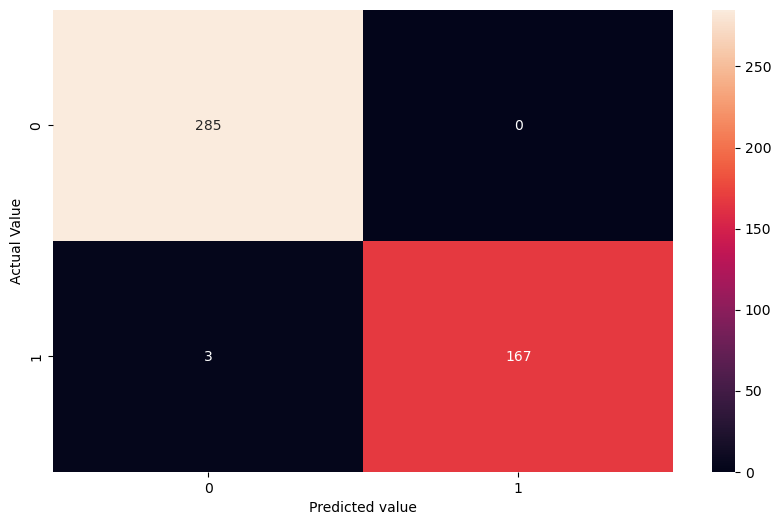

(   Accuracy    Recall  Precision  F1-score
 0  0.993407  0.982353        1.0  0.991098,)

In [77]:
# Training performance

breast_train_logreg = model_performance_classification(logreg, x_train_scaler, y_train)
breast_train_logreg

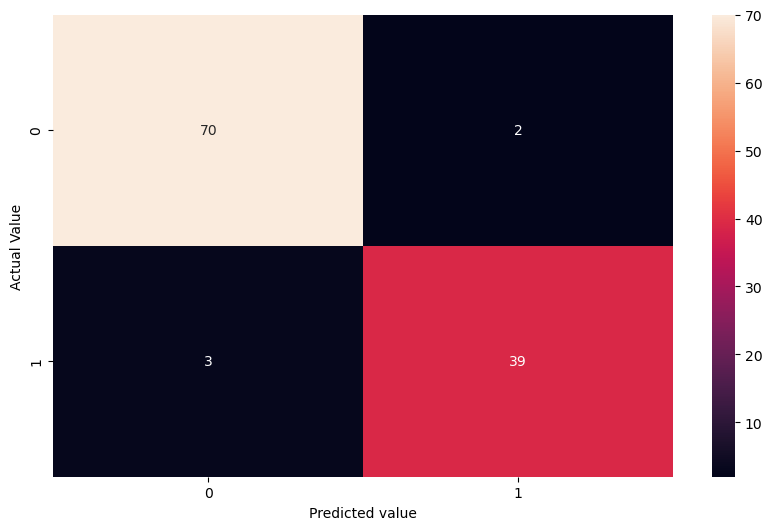

(   Accuracy    Recall  Precision  F1-score
 0   0.95614  0.928571    0.95122  0.939759,)

In [78]:
# Test Performance

breast_test_logreg = model_performance_classification(logreg, x_test_scaler, y_test)
breast_test_logreg

## Decision Tree Classifier

In [79]:
# To create an instant of the decision tree classifier

clf = DecisionTreeClassifier(random_state =0, criterion='entropy')

# To train the model

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
# To create an instant of the decision tree classifier

clf = DecisionTreeClassifier(random_state =0, criterion='entropy')

# To train the model

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:

# function to compute different metrics to check performance of a classification model

def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
     # convert probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute accuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],),
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf, fmt="g", annot=True)
    plt.ylabel("Actual Value")
    plt.xlabel("Predicted value")
    plt.show()

    return df_perf

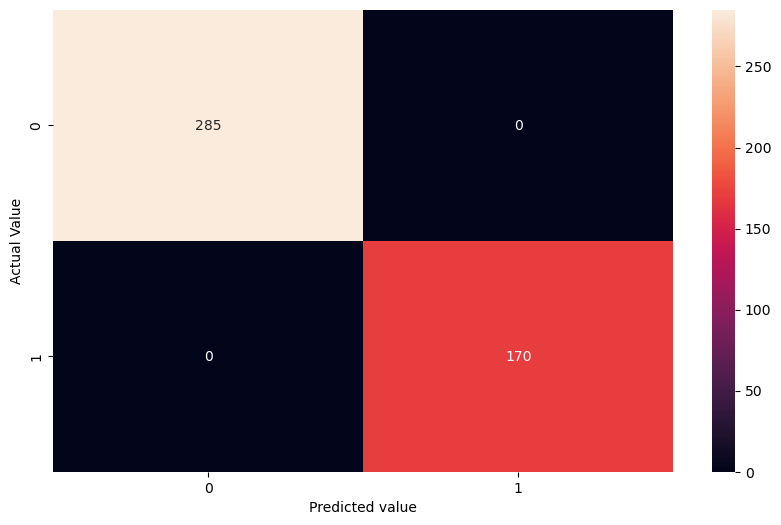

(   Accuracy  Recall  Precision  F1-score
 0       1.0     1.0        1.0       1.0,)

In [82]:
# Training performance

breast_train_clf = model_performance_classification(clf, x_train, y_train)
breast_train_clf

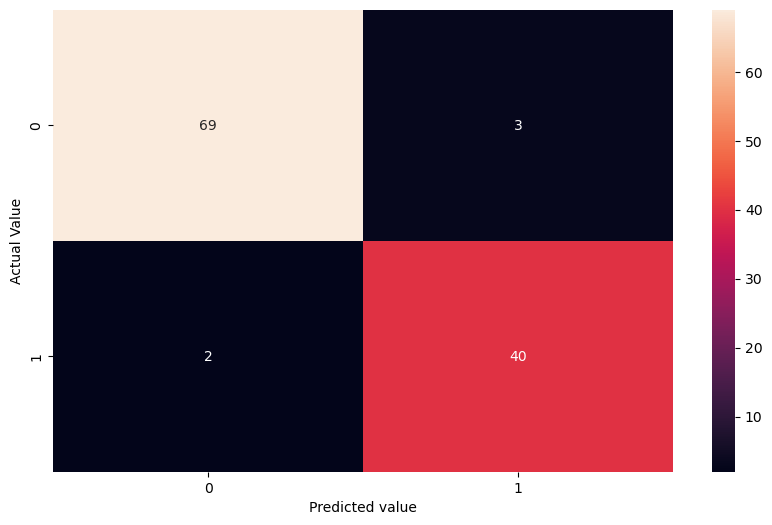

(   Accuracy    Recall  Precision  F1-score
 0   0.95614  0.952381   0.930233  0.941176,)

In [83]:
# Test performance

breast_test_clf = model_performance_classification(clf, x_test, y_test)
breast_test_clf